<img align="right" width="125" src="https://www.ou.nl/documents/40554/3255217/Logo_OU.jpg"/>

<br>
<center> <font size ="6" color='red'> IB3502 - Python Programming </font></center>
<center> <font size ="6" color='red'> Assignment 2</font></center> <br>
 <font size ="5" color='red'> Creating a dashboard of Covid-19 trends in the Netherlands</font>

<font size ="4" color='red'>*Introduction*</font> <br>
In this assignment you will design and develop a (live) dashboard to show Covid-19 information and trends in the Netherlands on an annual basis. These trends concern the total number of reported cases, the number of hospital admissions, and the number of deaths. The Dashboard shows these trends at two levels: the entire country and the level of the province. Figures 1-4 give examples of these trends.


<figure>
<img  src="https://github.com/muratfirat78/Python/raw/main/Pic1.png" style="width:70%">
<figcaption align = "center"> Figure 1. Total number of reported cases of Covid19, hospital admissions and deaths for the whole of the Netherlands in 2020. </figcaption>
</figure>

<figure>
<img  src="https://github.com/muratfirat78/Python/raw/main/Pic2.png" style="width:70%">
<figcaption align = "center"> Figure 2. Total number of reported Covid19 cases, hospitalizations and deaths for provinces in 2020. </figcaption>
</figure>

<figure>
<img  src="https://github.com/muratfirat78/Python/raw/main/Pic3.png" style="width:70%">
<figcaption align = "center"> Figure 3. Total number of reported cases of Covid19, hospital admissions and deaths for the municipalities of Utrecht in 2020. </figcaption>
</figure>

<figure>
<img  src="https://github.com/muratfirat78/Python/raw/main/Pic4.png" style="width:70%">
<figcaption align = "center"> Figure 4. Total number of reported cases of Covid19, hospital admissions and deaths for the province of Utrecht in 2020..(*months are sorted alphabetically. In your program the order should be based on the correct month number). </figcaption>
</figure>

<font size ="4" color='red'>*Data Sets*</font> <br>


To create this dashboard, you can use the datasets made available by the data.overheid.nl website. You can find the updated datasets here:
(Please note: The Netherlands has reached an endemic phase for the SARS-CoV-2 virus (coronavirus) and the GGD test lanes have been closed as of March 17, 2023. As a result, the data will no longer be updated as of April 1, 2023.)





<font size ="4" color='red'> *Requirements:* </font><br>


The requirements are as follows:

<ul>
 <li>Perform basic functionality as depicted in Figure 1-4.</li>
 <li>Runtime of the program: Note that the data from the above datasets covers the beginning of the pandemic from 2020 to the present. Since the resulting files are large to be processed by Jupyter Notebook, it may be necessary to split the data by year to have a separate file for each year. The required prior knowledge of the chosen course must be met.</li> 
 <li>Interactivity: The dashboard provided should be interactive and changing the input (e.g. changing the year or checking/unchecking checkboxes) should have an immediate effect on the results.</li> 
 <li>Extend the dashboard with more insightful features: This is an open and creative part of the assignment. You are expected to add additional features to the dashboard to gain a more insightful view of the data.</li> 
 <li>You are required to deliver an executable Jupyter notebook document to execute and display the dashboard.</li> 

 <li>Submitting a short report (max. 2 pages PDF) to explain the programme and its structure, assumptions, implementation, etc.</li> 
</ul>


<font size ="4" color='red'> *Modules to utilize:* </font><br>


You can use ipywidgets which contain a set of interactive HTML widgets to support the graphical user interface and interactivity between the user and the program. See here to read more about ipywidgets: https://ipywidgets.readthedocs.io/en/latest/

</ul>

<font size ="4" color='red'> *Assessment* </font><br>
 Evaluation of the program will be done based on the following criteria:

<ul>
 <li> Functionality (30%) </li>
 <li> Accuracy of results (20%)</li>
 <li> Quality of code (e.g. modularity, documentation) (20%) </li>
 <li> Creativity (e.g. adding two or more additional interesting features)(30%)</li>




In [2]:
from pathlib import Path
import data_loader
import dataframe_cleaner
import dataframe_combiner

In [ ]:
# URLs for the covid data
url_cases_2 = "https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv"
url_cases_1 = "https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag_tm_03102021.csv"
url_hosp_2 = "https://data.rivm.nl/covid-19/COVID-19_ziekenhuisopnames.csv"
url_hosp_1 = "https://data.rivm.nl/data/covid-19/COVID-19_ziekenhuisopnames_tm_03102021.csv"

data_dir = Path("data")

data_loader.download_data_from_url(url_cases_2, data_dir / "cases_2.csv")
data_loader.download_data_from_url(url_cases_1, data_dir / "cases_1.csv")
data_loader.download_data_from_url(url_hosp_2, data_dir / "hosp_2.csv")
data_loader.download_data_from_url(url_hosp_1, data_dir / "hosp_1.csv")

data_loader.load_municipality_geodata(data_dir / "municipalities_2023.geojson")

Saved municipality data to datasets/municipalities_2023.geojson


statcode  jrstatcode        statnaam   rubriek   id  \
0     GM0014  2023GM0014       Groningen  gemeente    1   
1     GM0034  2023GM0034          Almere  gemeente    2   
2     GM0037  2023GM0037     Stadskanaal  gemeente    3   
3     GM0047  2023GM0047         Veendam  gemeente    4   
4     GM0050  2023GM0050        Zeewolde  gemeente    5   
..       ...         ...             ...       ...  ...   
337   GM1979  2023GM1979       Eemsdelta  gemeente  338   
338   GM1980  2023GM1980   Dijk en Waard  gemeente  339   
339   GM1982  2023GM1982  Land van Cuijk  gemeente  340   
340   GM1991  2023GM1991       Maashorst  gemeente  341   
341   GM1992  2023GM1992  Voorne aan Zee  gemeente  342   

                                              geometry  
0    MULTIPOLYGON (((6.74047 53.31218, 6.74268 53.3...  
1    MULTIPOLYGON (((5.26798 52.42737, 5.27581 52.4...  
2    MULTIPOLYGON (((7.01013 53.0737, 7.01333 53.06...  
3    MULTIPOLYGON (((6.89963 53.12807, 6.9348 53.12...  
4    MULTIPOLYGON (((5.6162 52.36874, 5.61567 52.36...  
..                                                 ...  
337  MULTIPOLYGON (((6.87896 53.40515, 6.88806 53.3...  
338  MULTIPOLYGON (((4.79273 52.72049, 4.79399 52.7...  
339  MULTIPOLYGON (((5.7693 51.75235, 5.77967 51.75...  
340  MULTIPOLYGON (((5.70109 51.75536, 5.69991 51.7...  
341  MULTIPOLYGON (((4.22038 51.82591, 4.22008 51.8...  

[342 rows x 6 columns]

In [ ]:
file_cases_1 = Path(data_dir / "cases_1.csv")
file_cases_2 = Path(data_dir / "cases_2.csv")
df_cases = data_loader.load_and_concatenate_csv(file_cases_1, file_cases_2)

file_hospital_1 = Path(data_dir / "hosp_1.csv")
file_hospital_2 = Path(data_dir / "hosp_2.csv")
df_hospital = data_loader.load_and_concatenate_csv(file_hospital_1, file_hospital_2)

file_population = Path(data_dir / "population_data.csv")
df_population = data_loader.load_population_data(file_population)


In [ ]:
df_cases_cleaned = dataframe_cleaner.clean_cases_df(df_cases)
df_hospital_cleaned = dataframe_cleaner.clean_hospital_df(df_hospital)
df_population_cleaned = dataframe_cleaner.clean_population_df(df_population)
df_covid = dataframe_combiner.combine_cases_and_hospital_data(df_cases_cleaned, df_hospital_cleaned)
df = dataframe_combiner.add_population_and_calculate_incidence(df_covid, df_population_cleaned)
df.head()

In [64]:
import pandas as pd

df1 = pd.read_csv("data/cases_2.csv", sep=";")
df2 = pd.read_csv("data/cases_1.csv", sep=";")
df3 = pd.read_csv("data/hosp_2.csv", sep=";")
df4 = pd.read_csv("data/hosp_1.csv", sep=";")


In [65]:
# Clean and concatenate the cases & deaths data (df1 + df2)
# Convert publication dates to datetime
df1["Date_of_publication"] = pd.to_datetime(df1["Date_of_publication"], errors="coerce")
df2["Date_of_publication"] = pd.to_datetime(df2["Date_of_publication"], errors="coerce")

# Drop non-municipality rows (regional/national totals)
df1_municipalities = df1.dropna(subset=["Municipality_code", "Municipality_name"])
df2_municipalities = df2.dropna(subset=["Municipality_code", "Municipality_name"])

# Concatenate both parts
df_cases_municipalities = pd.concat([df2_municipalities, df1_municipalities], ignore_index=True)

# Optional: unify column names
df_cases_municipalities.rename(columns={
    "Date_of_publication": "Date",
}, inplace=True)


In [66]:
# Clean and concatenate the hospital admissions data (df3 + df4)
# Convert hospital admission dates
df3["Date_of_statistics"] = pd.to_datetime(df3["Date_of_statistics"], errors="coerce")
df4["Date_of_statistics"] = pd.to_datetime(df4["Date_of_statistics"], errors="coerce")

# Drop non-municipality rows
df3_municipalities = df3.dropna(subset=["Municipality_code", "Municipality_name"])
df4_municipalities = df4.dropna(subset=["Municipality_code", "Municipality_name"])

# Concatenate hospital data
df_hosp_municipalities = pd.concat([df4_municipalities, df3_municipalities], ignore_index=True)

# Rename for consistency
df_hosp_municipalities.rename(columns={
    "Date_of_statistics": "Date"
}, inplace=True)


In [67]:
# Convert Municipality_code to string (if not already)
df_cases_municipalities["Municipality_code"] = df_cases_municipalities["Municipality_code"].astype(str)
df_hosp_municipalities["Municipality_code"] = df_hosp_municipalities["Municipality_code"].astype(str)

#### Checking Municipality Code Alignment

Before merging the case/death data (`df_cases`) and hospital admission data (`df_hosp`), we check whether the set of municipality codes is consistent between both datasets. Misaligned codes can result in incorrect merges and missing data.

In [68]:
# Get unique municipality codes from both datasets
codes_cases = set(df_cases_municipalities["Municipality_code"].dropna().astype(str).unique())
codes_hosp = set(df_hosp_municipalities["Municipality_code"].dropna().astype(str).unique())

# Find possible mismatches
codes_only_in_cases = codes_cases - codes_hosp
codes_only_in_hosp = codes_hosp - codes_cases

# Dictionary of codes: names from case data
names_only_in_cases = (
    df_cases_municipalities[df_cases_municipalities["Municipality_code"].isin(codes_only_in_cases)]
    .drop_duplicates(subset=["Municipality_code"])
    .set_index("Municipality_code")["Municipality_name"]
    .sort_index()
    .to_dict()
)

# Dictionary of codes: names from hospital data
names_only_in_hosp = (
    df_hosp_municipalities[df_hosp_municipalities["Municipality_code"].isin(codes_only_in_hosp)]
    .drop_duplicates(subset=["Municipality_code"])
    .set_index("Municipality_code")["Municipality_name"]
    .sort_index()
    .to_dict()
)

print("Municipality codes only in case data:")
print(names_only_in_cases)

print("Municipality codes only in hospital data:")
print(names_only_in_hosp)


Municipality codes only in case data:
{'GM0501': 'Brielle', 'GM0530': 'Hellevoetsluis', 'GM0614': 'Westvoorne'}
Municipality codes only in hospital data:
{}


#### Observation: Fused Municipalities

We observe that three municipality codes — corresponding to Brielle, Hellevoetsluis, and Westvoorne — are present in the case data but missing in the hospital data. These municipalities were officially merged into a new municipality called **Voorne aan Zee** on January 1, 2023. The hospital dataset uses the updated code and name, while the case dataset still includes the older, separate ones.


#### Resolving Municipality Code Differences

We choose to update the three former municipalities in the case dataset to match the new administrative structure. We replace their names and codes with those of Voorne aan Zee (Municipality_code = "GM1992"), and then aggregate any resulting duplicate rows.


In [69]:
# Replace Brielle, Hellevoetsluis, and Westvoorne with Voorne aan Zee
old_codes = ["GM0501", "GM0530", "GM0614"]
new_code = "GM1992"
new_name = "Voorne aan Zee"

df_cases_municipalities["Municipality_code"] = df_cases_municipalities["Municipality_code"].replace(old_codes, new_code)
df_cases_municipalities["Municipality_name"] = df_cases_municipalities["Municipality_name"].replace(
    {"Brielle": new_name, "Hellevoetsluis": new_name, "Westvoorne": new_name}
)

# After replacement, aggregate duplicates
df_cases_municipalities = (
    df_cases_municipalities
    .groupby(["Date", "Municipality_code", "Municipality_name", "Province"], as_index=False)
    .agg({"Total_reported": "sum", "Deceased": "sum"})
)


In [70]:
df_cases_municipalities[df_cases_municipalities["Municipality_code"] == "GM1992"].head(10)


Date Municipality_code Municipality_name      Province  \
341  2020-02-28            GM1992    Voorne aan Zee  Zuid-Holland   
683  2020-02-29            GM1992    Voorne aan Zee  Zuid-Holland   
1025 2020-03-01            GM1992    Voorne aan Zee  Zuid-Holland   
1367 2020-03-02            GM1992    Voorne aan Zee  Zuid-Holland   
1709 2020-03-03            GM1992    Voorne aan Zee  Zuid-Holland   
2051 2020-03-04            GM1992    Voorne aan Zee  Zuid-Holland   
2393 2020-03-05            GM1992    Voorne aan Zee  Zuid-Holland   
2735 2020-03-06            GM1992    Voorne aan Zee  Zuid-Holland   
3077 2020-03-07            GM1992    Voorne aan Zee  Zuid-Holland   
3419 2020-03-08            GM1992    Voorne aan Zee  Zuid-Holland   

      Total_reported  Deceased  
341                0         0  
683                0         0  
1025               0         0  
1367               0         0  
1709               0         0  
2051               0         0  
2393               0         0  
2735               0         0  
3077               0         0  
3419               0         0

In [74]:
# Perform outer-merge on Date and Municipality_code
df_all_municipalities = pd.merge(
    df_hosp_municipalities[["Date", "Municipality_code", "Municipality_name", "Hospital_admission"]],
    df_cases_municipalities[["Date", "Municipality_code", "Province", "Total_reported", "Deceased"]],
    how="outer",
    on=["Date", "Municipality_code"]
)

df_all_municipalities["Year"] = df_all_municipalities["Date"].dt.year

In [75]:
df_all_municipalities.head()

Date Municipality_code Municipality_name  Hospital_admission Province  \
0 2020-02-27            GM0014         Groningen                   0      NaN   
1 2020-02-27            GM0034            Almere                   0      NaN   
2 2020-02-27            GM0037       Stadskanaal                   0      NaN   
3 2020-02-27            GM0047           Veendam                   0      NaN   
4 2020-02-27            GM0050          Zeewolde                   0      NaN   

   Total_reported  Deceased  Year  
0             NaN       NaN  2020  
1             NaN       NaN  2020  
2             NaN       NaN  2020  
3             NaN       NaN  2020  
4             NaN       NaN  2020

In [76]:
df_all_municipalities.isna().sum()

Date                       0
Municipality_code          0
Municipality_name          0
Hospital_admission         0
Province              125514
Total_reported        125514
Deceased              125514
Year                       0
dtype: int64

In [21]:
from owslib.wfs import WebFeatureService

wfs_url = "https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetCapabilities&service=WFS"
wfs = WebFeatureService(url=wfs_url, version="2.0.0")

# Print available layer names and titles
for name in wfs.contents:
    print(name, "—", wfs.contents[name].title)


gebiedsindelingen:arbeidsmarktregio_gegeneraliseerd — arbeidsmarktregio_gegeneraliseerd
gebiedsindelingen:arbeidsmarktregio_labelpoint — arbeidsmarktregio_labelpoint
gebiedsindelingen:arrondissementsgebied_gegeneraliseerd — arrondissementsgebied_gegeneraliseerd
gebiedsindelingen:arrondissementsgebied_labelpoint — arrondissementsgebied_labelpoint
gebiedsindelingen:buurt_gegeneraliseerd — buurt_gegeneraliseerd
gebiedsindelingen:buurt_labelpoint — buurt_labelpoint
gebiedsindelingen:buurt_niet_gegeneraliseerd — buurt_niet_gegeneraliseerd
gebiedsindelingen:coropgebied_gegeneraliseerd — coropgebied_gegeneraliseerd
gebiedsindelingen:coropgebied_labelpoint — coropgebied_labelpoint
gebiedsindelingen:coropplusgebied_gegeneraliseerd — coropplusgebied_gegeneraliseerd
gebiedsindelingen:coropplusgebied_labelpoint — coropplusgebied_labelpoint
gebiedsindelingen:coropsubgebied_gegeneraliseerd — coropsubgebied_gegeneraliseerd
gebiedsindelingen:coropsubgebied_labelpoint — coropsubgebied_labelpoint
gebied

Fetching municipality data...
Loaded 342 features


<Axes: >

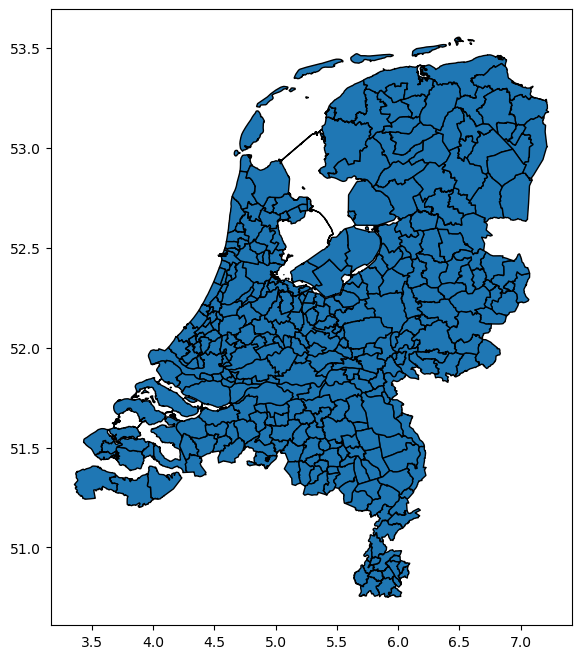

In [22]:
import requests
import geopandas as gpd
from shapely.geometry import shape

# Define WFS endpoint
url = "https://service.pdok.nl/cbs/gebiedsindelingen/2023/wfs/v1_0"

params = {
    "service": "WFS",
    "version": "2.0.0",
    "request": "GetFeature",
    "typename": "gebiedsindelingen:gemeente_gegeneraliseerd",
    "outputFormat": "application/json",
    "srsName": "EPSG:4326"
}

print("Fetching municipality data...")
response = requests.get(url, params=params)
response.raise_for_status()
data = response.json()

# Extract geometries manually and construct GeoDataFrame
features = data["features"]
geoms = [shape(feature["geometry"]) for feature in features]
props = [feature["properties"] for feature in features]

gdf = gpd.GeoDataFrame(props, geometry=geoms, crs="EPSG:4326")

# Plot
print(f"Loaded {len(gdf)} features")
gdf.plot(edgecolor="black", figsize=(8, 8))


In [ ]:
df_pop_municipalities = df_pop[df_pop['RegioS'].str.startswith('GM')]
df_pop_municipalities.head()

ID  RegioS  Perioden  TotaleBevolking_1  Mannen_2  Vrouwen_3
0  1737  GM1680  2022JJ00            25579.0   12774.0    12805.0
1  1767  GM0738  2022JJ00                NaN       NaN        NaN
2  1797  GM0358  2022JJ00            32452.0   16107.0    16345.0
3  1827  GM0197  2022JJ00            27100.0   13630.0    13470.0
4  1857  GM0480  2022JJ00                NaN       NaN        NaN

In [ ]:
# Get unique municipality codes from both datasets
codes_cases = set(df_cases_municipalities["Municipality_code"].dropna().astype(str).unique())
codes_pop = set(df_pop_municipalities["RegioS"].dropna().astype(str).unique())

# Find possible mismatches
codes_only_in_cases = codes_cases - codes_pop
codes_only_in_pop = codes_pop - codes_cases

print(f"codes_only_in_cases: {codes_only_in_cases}")
print(f"codes_only_in_pop: {codes_only_in_pop}")

codes_only_in_cases: set()
codes_only_in_pop: {'GM0255', 'GM0519', 'GM0650', 'GM0733', 'GM0017', 'GM0248', 'GM0623', 'GM0010', 'GM0462', 'GM0741', 'GM0052', 'GM0811', 'GM0457', 'GM0902', 'GM0836', 'GM0530', 'GM0791', 'GM0124', 'GM0064', 'GM0123', 'GM0070', 'GM0132', 'GM0689', 'GM0617', 'GM0493', 'GM0776', 'GM0555', 'GM0257', 'GM0231', 'GM0206', 'GM0292', 'GM0849', 'GM0058', 'GM0136', 'GM0295', 'GM0754', 'GM0476', 'GM0720', 'GM0612', 'GM1908', 'GM0768', 'GM0018', 'GM0120', 'GM0649', 'GM0258', 'GM0113', 'GM0133', 'GM0390', 'GM0814', 'GM0130', 'GM1702', 'GM0941', 'GM1679', 'GM0563', 'GM0837', 'GM0923', 'GM0890', 'GM0497', 'GM0053', 'GM0329', 'GM0628', 'GM0009', 'GM0504', 'GM0871', 'GM0710', 'GM0571', 'GM0962', 'GM0808', 'GM0138', 'GM0117', 'GM0024', 'GM0619', 'GM0039', 'GM0977', 'GM0186', 'GM0925', 'GM0491', 'GM0897', 'GM0725', 'GM0181', 'GM0645', 'GM0864', 'GM0372', 'GM0366', 'GM0872', 'GM0643', 'GM0105', 'GM0395', 'GM0154', 'GM0007', 'GM0501', 'GM0174', 'GM0898', 'GM0169', 'GM0614', 'GM

In [ ]:
df_pop_municipalities = df_pop_municipalities[~df_pop_municipalities["RegioS"].isin(codes_only_in_pop)][['RegioS', 'TotaleBevolking_1']]
df_pop_municipalities.head()

RegioS  TotaleBevolking_1
0  GM1680            25579.0
2  GM0358            32452.0
3  GM0197            27100.0
7  GM0059            27954.0
9  GM0482            20087.0

In [ ]:
# Let's go!
df_pop_municipalities["RegioS"] = df_pop_municipalities["RegioS"].astype(str)
gdf["statcode"] = gdf["statcode"].astype(str)

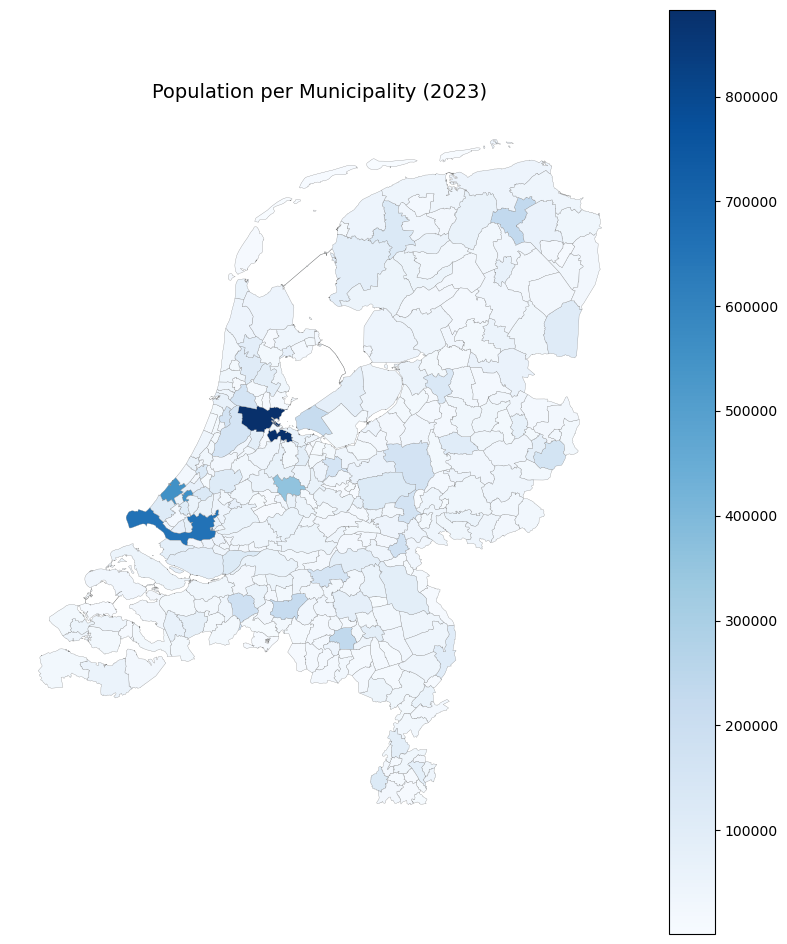

In [ ]:
gdf_pop = gdf.merge(df_pop_municipalities, left_on="statcode", right_on="RegioS", how="left")

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
gdf_pop.plot(
    column="TotaleBevolking_1",            # Replace with your actual population column name
    cmap="Blues",                   # Or another color map: "OrRd", "viridis", etc.
    legend=True,
    linewidth=0.2,
    edgecolor="gray",
    ax=ax
)
ax.set_title("Population per Municipality (2023)", fontsize=14)
ax.axis("off")
plt.show()


In [ ]:
import folium

# Optional: round for prettier tooltips
gdf_pop["TotaleBevolking_1"] = gdf_pop["TotaleBevolking_1"].round(0)


In [ ]:
# Center the map roughly on NL
m = folium.Map(location=[52.1, 5.3], zoom_start=7, tiles="cartodbpositron")


In [ ]:
folium.Choropleth(
    geo_data=gdf_pop,
    name="TotaleBevolking_1",
    data=gdf_pop,
    columns=["statcode", "TotaleBevolking_1"],
    key_on="feature.properties.statcode",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population (2023)"
).add_to(m)

In [ ]:
# Add tooltips with municipality names and population
folium.GeoJson(
    gdf_pop,
    name="Hover Info",
    style_function=lambda feature: {
        "fillOpacity": 0,
        "color": "transparent"
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=["statnaam", "TotaleBevolking_1"],
        aliases=["Municipality", "TotaleBevolking_1"],
        localize=True
    )
).add_to(m)


In [ ]:
m

In [ ]:
df_pop_municipalities[df_pop_municipalities['RegioS']=="GM1992"]

RegioS  TotaleBevolking_1
696  GM1992                NaN

In [ ]:
df_pop[df_pop["RegioS"].str.startswith("GM")].sort_values(by="TotaleBevolking_1", ascending=False)[["RegioS", "TotaleBevolking_1", "Naam_292", "Gemeenten_313"]]

RegioS  TotaleBevolking_1  \
83   GM0363           873338.0   
583  GM0599           651631.0   
280  GM0518           548320.0   
664  GM0344           359370.0   
233  GM0772           235691.0   
..      ...                ...   
773  GM0056                NaN   
774  GM0136                NaN   
776  GM0137                NaN   
780  GM0192                NaN   
781  GM0138                NaN   

                                              Naam_292  Gemeenten_313  
83   Amsterdam                                     ...            1.0  
583  Rotterdam                                     ...            1.0  
280  Den Haag                                      ...            1.0  
664  Midden-Nederland                              ...            1.0  
233  Oost-Brabant                                  ...            1.0  
..                                                 ...            ...  
773                                                NaN            NaN  
774                                                NaN            NaN  
776                                                NaN            NaN  
780                                                NaN            NaN  
781                                                NaN            NaN  

[727 rows x 4 columns]

In [ ]:
df_pop[df_pop["Gemeenten_313"]==True].sort_values(by="TotaleBevolking_1", ascending=False)[["RegioS", "TotaleBevolking_1", "Gemeenten_313", 'Naam_290', 'Code_291', 'Naam_292', 'Naam_310']]

RegioS  TotaleBevolking_1  Gemeenten_313  \
83   GM0363           873338.0            1.0   
583  GM0599           651631.0            1.0   
280  GM0518           548320.0            1.0   
664  GM0344           359370.0            1.0   
233  GM0772           235691.0            1.0   
..      ...                ...            ...   
646  GM0093             4870.0            1.0   
78   GM0060             3746.0            1.0   
585  GM0277             1726.0            1.0   
689  GM0096             1194.0            1.0   
597  GM0088              931.0            1.0   

                                              Naam_290    Code_291  \
83   Noord-Holland                                 ...  RE05         
583  Zuid-Holland                                  ...  RE07         
280  Zuid-Holland                                  ...  RE06         
664  Utrecht                                       ...  RE03         
233  Noord-Brabant                                 ...  RE09         
..                                                 ...         ...   
646  Fryslân                                       ...  RE01         
78   Fryslân                                       ...  RE01         
585  Gelderland                                    ...  RE02         
689  Fryslân                                       ...  RE01         
597  Fryslân                                       ...  RE01         

                                              Naam_292  \
83   Amsterdam                                     ...   
583  Rotterdam                                     ...   
280  Den Haag                                      ...   
664  Midden-Nederland                              ...   
233  Oost-Brabant                                  ...   
..                                                 ...   
646  Noord-Nederland                               ...   
78   Noord-Nederland                               ...   
585  Oost-Nederland                                ...   
689  Noord-Nederland                               ...   
597  Noord-Nederland                               ...   

                                              Naam_310  
83   Amsterdam-Amstelland                          ...  
583  Rotterdam-Rijnmond                            ...  
280  Haaglanden                                    ...  
664  Utrecht                                       ...  
233  Brabant-Zuidoost                              ...  
..                                                 ...  
646  Fryslân                                       ...  
78   Fryslân                                       ...  
585  Gelderland-Midden                             ...  
689  Fryslân                                       ...  
597  Fryslân                                       ...  

[353 rows x 7 columns]

In [ ]:
df_pop.columns

Index(['ID', 'RegioS', 'Perioden', 'TotaleBevolking_1', 'Mannen_2',
       'Vrouwen_3', 'JongerDan5Jaar_4', 'k_5Tot10Jaar_5', 'k_10Tot15Jaar_6',
       'k_15Tot20Jaar_7', 'k_20Tot25Jaar_8', 'k_25Tot45Jaar_9',
       'k_45Tot65Jaar_10', 'k_65Tot80Jaar_11', 'k_80JaarOfOuder_12',
       'Code_289', 'Naam_290', 'Code_291', 'Naam_292', 'Code_309', 'Naam_310',
       'Gemeenten_313', 'KoppelvariabeleRegioCode_316'],
      dtype='object')

In [11]:
import pandas as pd

In [19]:
df_pop = pd.read_csv("data/population_data_2020_2024.csv", sep=";")  # adjust path as needed

df_pop = df_pop.rename(columns={
    "RegioS": "Region_code",
    "Perioden": "Year_raw",
    "TotaleBevolking_1": "Population"
})

df_pop["Year"] = df_pop["Year_raw"].str.slice(0, 4).astype(int)

df_pop_municipal = df_pop[df_pop["Region_code"].str.startswith("GM")].copy()
df_pop_province = df_pop[df_pop["Region_code"].str.startswith("PV")].copy()

df_pop_municipal.drop(columns=["ID", "Year_raw"], inplace=True)
df_pop_province.drop(columns=["ID", "Year_raw"], inplace=True)

df_pop_municipal.rename(columns={"Region_code": "Municipality_code"}, inplace=True)
df_pop_province.rename(columns={"Region_code": "Province_code"}, inplace=True)

In [20]:
# Find codes that never have any population value (all NaN)
empty_codes = (
    df_pop_municipal.groupby("Municipality_code")["Population"]
    .apply(lambda x: x.isna().all())
)

# Get list of codes to remove
empty_codes = empty_codes[empty_codes].index.tolist()

# Drop them from the dataset
df_pop_municipal = df_pop_municipal[~df_pop_municipal["Municipality_code"].isin(empty_codes)].copy()


In [21]:
# Pivot to get one row per municipality, columns = years
pop_pivot = df_pop_municipal.pivot_table(
    index="Municipality_code",
    columns="Year",
    values="Population"
).sort_index(axis=1)

# Identify the first and last year in the columns
first_year = pop_pivot.columns.min()
last_year = pop_pivot.columns.max()

# Find new municipalities: NaN in first year, value in last year
new_municipalities = pop_pivot[
    pop_pivot[first_year].isna() & pop_pivot[last_year].notna()
]

# Find disappeared municipalities: value in first year, NaN in last year
disappeared_municipalities = pop_pivot[
    pop_pivot[first_year].notna() & pop_pivot[last_year].isna()
]



In [22]:
new_municipalities

Year               2020     2021     2022     2023     2024
Municipality_code                                          
GM1979              NaN  45587.0  45389.0  45394.0  45106.0
GM1980              NaN      NaN  87695.0  88985.0  90076.0
GM1982              NaN      NaN  90707.0  91423.0  91722.0
GM1991              NaN      NaN  58362.0  58934.0  59222.0
GM1992              NaN      NaN      NaN  73945.0  74304.0

In [23]:
disappeared_municipalities

Year                  2020     2021     2022  2023  2024
Municipality_code                                       
GM0003             11642.0      NaN      NaN   NaN   NaN
GM0010             24678.0      NaN      NaN   NaN   NaN
GM0024              9537.0      NaN      NaN   NaN   NaN
GM0370             10022.0  10110.0      NaN   NaN   NaN
GM0398             57587.0  58387.0      NaN   NaN   NaN
GM0416             28163.0  28335.0      NaN   NaN   NaN
GM0457             19738.0  20445.0  20766.0   NaN   NaN
GM0501             17271.0  17439.0  17704.0   NaN   NaN
GM0530             40142.0  40312.0  40574.0   NaN   NaN
GM0614             14731.0  14900.0  14960.0   NaN   NaN
GM0756             29365.0  29609.0      NaN   NaN   NaN
GM0786             12436.0  12486.0      NaN   NaN   NaN
GM0788             14370.0      NaN      NaN   NaN   NaN
GM0815             10939.0  11004.0      NaN   NaN   NaN
GM0856             42119.0  42291.0      NaN   NaN   NaN
GM1684             25130.0  25404.0      NaN   NaN   NaN
GM1685             15730.0  15817.0      NaN   NaN   NaN
GM1702             11664.0  11691.0      NaN   NaN   NaN

### **Municipality Mergers (2020–2024)**

Several Dutch municipalities in the population dataset were dissolved and merged into new or existing municipalities during the period 2020–2024. This affects how we integrate population data with COVID statistics.

Below is a manual mapping of the disappeared municipalities and their successors:

| **Old Code** | **Old Municipality**        | **Merged Into**           | **New Code** |
|--------------|-----------------------------|---------------------------|--------------|
| GM0370       | Beemster                    | Purmerend                 | GM0439       |
| GM0398       | Heerhugowaard               | Dijk en Waard             | GM1980       |
| GM0416       | Langedijk                   | Dijk en Waard             | GM1980       |
| GM0457       | Weesp                       | Amsterdam                 | GM0363       |
| GM0501       | Brielle                     | Voorne aan Zee            | GM1992       |
| GM0530       | Hellevoetsluis              | Voorne aan Zee            | GM1992       |
| GM0614       | Westvoorne                  | Voorne aan Zee            | GM1992       |
| GM0756       | Boxmeer                     | Land van Cuijk            | GM1982       |
| GM0786       | Grave                       | Land van Cuijk            | GM1982       |
| GM0815       | Mill en Sint Hubert         | Land van Cuijk            | GM1982       |
| GM0856       | Uden                        | Maashorst                 | GM1991       |
| GM1684       | Cuijk                       | Land van Cuijk            | GM1982       |
| GM1685       | Landerd                     | Maashorst                 | GM1991       |
| GM1702       | Sint Anthonis               | Land van Cuijk            | GM1982       |
| GM0788       | Haaren                      | Oisterwijk                | GM0824       |
| GM0788       | Haaren                      | Vught                     | GM0865       |
| GM0788       | Haaren                      | Boxtel                    | GM0757       |
| GM0788       | Haaren                      | Tilburg                   | GM0855       |
| GM0003       | Appingedam                  | Eemsdelta                 | GM1979       |
| GM0010       | Delfzijl                    | Eemsdelta                 | GM1979       |
| GM0024       | Loppersum                   | Eemsdelta                 | GM1979       |


### **Handling the Split of Haaren's Population**

We encountered an issue with the municipality **Haaren**, which has been dissolved and its population distributed among four existing municipalities. These are the municipalities that received Haaren's population:

- **Oisterwijk** (GM0824)
- **Vught** (GM0865)
- **Boxtel** (GM0757)
- **Tilburg** (GM0855)

Since no specific distribution information was provided, we decided to split Haaren's total population evenly across these four receiving municipalities.

### **Steps Taken**:
1. Population of Haaren (GM0788) was identified in the dataset.
2. Split Haaren’s population evenly among the four receiving municipalities.
3. Updated the population data in the `df_pop_municipal_fused` dataset to reflect this even distribution.
4. Removed Haaren’s entry (GM0788) since it no longer exists as a separate municipality.

This ensures that the population is accurately distributed and represented across the newly merged municipalities, maintaining consistency for further analysis and mapping.


In [17]:
# Define the mapping of merged municipalities
fused_municipality_map = {
    "GM0370": "GM0439",  # Beemster → Purmerend
    "GM0398": "GM1980",  # Heerhugowaard → Dijk en Waard
    "GM0416": "GM1980",  # Langedijk → Dijk en Waard
    "GM0457": "GM0363",  # Weesp → Amsterdam
    "GM0501": "GM1992",  # Brielle → Voorne aan Zee
    "GM0530": "GM1992",  # Hellevoetsluis → Voorne aan Zee
    "GM0614": "GM1992",  # Westvoorne → Voorne aan Zee
    "GM0756": "GM1982",  # Boxmeer → Land van Cuijk
    "GM0786": "GM1982",  # Grave → Land van Cuijk
    "GM0815": "GM1982",  # Mill en Sint Hubert → Land van Cuijk
    "GM0856": "GM1991",  # Uden → Maashorst
    "GM1684": "GM1982",  # Cuijk → Land van Cuijk
    "GM1685": "GM1991",  # Landerd → Maashorst
    "GM1702": "GM1982",  # Sint Anthonis → Land van Cuijk
    "GM0003": "GM1979",  # Appingedam → Eemsdelta
    "GM0010": "GM1979",  # Delfzijl → Eemsdelta
    "GM0024": "GM1979",  # Loppersum → Eemsdelta
}

# Replace municipality codes with merged codes
df_pop_municipal["Municipality_code"] = df_pop_municipal["Municipality_code"].replace(fused_municipality_map)

# Split Haaren's population (GM0788) evenly across receiving municipalities
haaren_population = df_pop_municipal[df_pop_municipal["Municipality_code"] == "GM0788"]["Population"].values[0]
split_population = haaren_population / 4

# Define the receiving municipalities for Haaren
receiving_municipalities = {
    "GM0824": split_population,  # Oisterwijk
    "GM0865": split_population,  # Vught
    "GM0757": split_population,  # Boxtel
    "GM0855": split_population   # Tilburg
}

# Update the population data for the receiving municipalities
for code, population in receiving_municipalities.items():
    df_pop_municipal.loc[df_pop_municipal["Municipality_code"] == code, "Population"] += population

# Remove Haaren (GM0788) entry since it's dissolved
df_pop_municipal = df_pop_municipal[df_pop_municipal["Municipality_code"] != "GM0788"]

# Aggregate population data for merged municipalities by Municipality_code and Year
df_pop_municipal_fused = (
    df_pop_municipal
    .groupby(["Municipality_code", "Year"], as_index=False)
    .agg({"Population": "sum"})
)

In [24]:
df_pop_municipal[df_pop_municipal["Municipality_code"] == "GM0788"]

Municipality_code  Population  Year
1230            GM0788     14370.0  2020
1231            GM0788         NaN  2021
1232            GM0788         NaN  2022
1233            GM0788         NaN  2023
1234            GM0788         NaN  2024

In [84]:
df_pop_municipal_fused.Municipality_code.nunique()

342

In [85]:
# Preview structure
print(df_all_municipalities[["Date", "Municipality_code"]].head())
print(df_pop_municipal_fused[["Year", "Municipality_code"]].head())


        Date Municipality_code
0 2020-02-27            GM0014
1 2020-02-27            GM0034
2 2020-02-27            GM0037
3 2020-02-27            GM0047
4 2020-02-27            GM0050
   Year Municipality_code
0  2020            GM0014
1  2021            GM0014
2  2022            GM0014
3  2023            GM0014
4  2024            GM0014


In [86]:
df_all_municipalities

Date Municipality_code Municipality_name  Hospital_admission  \
0      2020-02-27            GM0014         Groningen                   0   
1      2020-02-27            GM0034            Almere                   0   
2      2020-02-27            GM0037       Stadskanaal                   0   
3      2020-02-27            GM0047           Veendam                   0   
4      2020-02-27            GM0050          Zeewolde                   0   
...           ...               ...               ...                 ...   
511285 2024-04-15            GM1979         Eemsdelta                   0   
511286 2024-04-15            GM1980     Dijk en Waard                   0   
511287 2024-04-15            GM1982    Land van Cuijk                   0   
511288 2024-04-15            GM1991         Maashorst                   0   
511289 2024-04-15            GM1992    Voorne aan Zee                   0   

       Province  Total_reported  Deceased  Year  
0           NaN             NaN       NaN  2020  
1           NaN             NaN       NaN  2020  
2           NaN             NaN       NaN  2020  
3           NaN             NaN       NaN  2020  
4           NaN             NaN       NaN  2020  
...         ...             ...       ...   ...  
511285      NaN             NaN       NaN  2024  
511286      NaN             NaN       NaN  2024  
511287      NaN             NaN       NaN  2024  
511288      NaN             NaN       NaN  2024  
511289      NaN             NaN       NaN  2024  

[511290 rows x 8 columns]

In [87]:
df_all_merged = df_all_municipalities.merge(
    df_pop_municipal_fused,
    on=["Municipality_code", "Year"],
    how="left"
)

# Check for population data presence
print(df_all_merged["Population"].isna().sum(), "rows have no population data")
print(df_all_merged["Population"].notna().sum(), "rows have population data")

# Optional: look at a few sample rows
print(df_all_merged[["Date", "Municipality_code", "Municipality_name", "Province", "Population"]].sample(5))



0 rows have no population data
511290 rows have population data
             Date Municipality_code Municipality_name       Province  \
135444 2021-03-29            GM0088   Schiermonnikoog        Fryslân   
286814 2022-06-14            GM0847           Someren  Noord-Brabant   
91913  2020-11-21            GM1586        Oost Gelre     Gelderland   
272378 2022-05-03            GM0513             Gouda   Zuid-Holland   
316190 2022-09-08            GM0687        Middelburg        Zeeland   

        Population  
135444       931.0  
286814     19701.0  
91913      29627.0  
272378     74095.0  
316190     49199.0  


In [88]:
missing_names = df_all_merged[df_all_merged["Municipality_name"].isna()]
missing_names.sort_values('Date')

Empty DataFrame
Columns: [Date, Municipality_code, Municipality_name, Hospital_admission, Province, Total_reported, Deceased, Year, Population]
Index: []

In [89]:
# Need to see if provinces are correct for merging with the covid data

In [91]:
#Trying out maps. Great fun!!!

In [92]:
import folium
import numpy as np

# Merge population into GeoDataFrame
gdf_pop = gdf.merge(
    df_pop_municipal_fused,
    left_on="statcode",
    right_on="Municipality_code",
    how="left"
)

# Filter for the year 2024
gdf_2023 = gdf_pop[gdf_pop["Year"] == 2024].copy()

# Define threshold scale
max_pop = gdf_2023["Population"].max()
thresholds = [0, 5000, 10000, 25000, 50000, 100000, 200000, 400000, max_pop + 1]

# Initialize folium map
m = folium.Map(location=[52.1, 5.3], zoom_start=7, tiles="cartodbpositron")

# Add choropleth layer
folium.Choropleth(
    geo_data=gdf_2023,
    name="Population 2023",
    data=gdf_2023,
    columns=["statcode", "Population"],
    key_on="feature.properties.statcode",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population (2023)",
    threshold_scale=thresholds,
    nan_fill_color="white",
    reset=True
).add_to(m)

# Add hover tooltips
folium.GeoJson(
    gdf_2023,
    name="Hover Info",
    style_function=lambda feature: {
        "fillOpacity": 0,
        "color": "transparent"
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=["statnaam", "Population"],  # Replace with "Municipality_name" if needed
        aliases=["Municipality", "Population"],
        localize=True
    )
).add_to(m)

m


In [93]:
import pandas as pd
import folium
import geopandas as gpd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create dropdown for available years
years = sorted(df_pop_municipal_fused["Year"].unique())
year_dropdown = widgets.Dropdown(
    options=years,
    value=2020,
    description="Year:"
)

# Display output container
output = widgets.Output()

# Map plotting function
def plot_map(year):
    # Filter population data for selected year and merge with GeoDataFrame
    pop_year = df_pop_municipal_fused[df_pop_municipal_fused["Year"] == year]
    gdf_year = gdf.merge(pop_year, left_on="statcode", right_on="Municipality_code", how="left")

    # Create base folium map
    m = folium.Map(location=[52.1, 5.3], zoom_start=7, tiles="cartodbpositron")

    # Define thresholds with more even spacing and a rounded max
    thresholds = [n for n in range(0, 1_000_000, 10_000)] #[0, 10_000, 25_000, 50_000, 125_000, 250_000, 500_000, 1_000_000]

    # Add choropleth layer
    folium.Choropleth(
        geo_data=gdf_year,
        data=gdf_year,
        columns=["statcode", "Population"],
        key_on="feature.properties.statcode",
        fill_color="YlGnBu",
        threshold_scale=thresholds,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"Population ({year})",
        nan_fill_color="white",
        reset=True
    ).add_to(m)

    # Add hover tooltips
    folium.GeoJson(
        gdf_year,
        name="Tooltip",
        style_function=lambda feature: {
            "fillOpacity": 0,
            "color": "transparent"
        },
        tooltip=folium.GeoJsonTooltip(
            fields=["statnaam", "Population"],
            aliases=["Municipality", "Population"],
            localize=True,
            labels=True,
            sticky=True,
            style="font-size: 12px;"
        )
    ).add_to(m)

    return m

# Callback to update map on dropdown change
def on_change(change):
    with output:
        clear_output(wait=True)
        display(plot_map(change["new"]))

# Setup initial map and interactivity
year_dropdown.observe(on_change, names="value")
display(year_dropdown)

with output:
    display(plot_map(year_dropdown.value))
display(output)


Dropdown(description='Year:', options=(2020, 2021, 2022, 2023, 2024), value=2020)

Output()

In [94]:
df_all_municipalities.head()

Date Municipality_code Municipality_name  Hospital_admission Province  \
0 2020-02-27            GM0014         Groningen                   0      NaN   
1 2020-02-27            GM0034            Almere                   0      NaN   
2 2020-02-27            GM0037       Stadskanaal                   0      NaN   
3 2020-02-27            GM0047           Veendam                   0      NaN   
4 2020-02-27            GM0050          Zeewolde                   0      NaN   

   Total_reported  Deceased  Year  
0             NaN       NaN  2020  
1             NaN       NaN  2020  
2             NaN       NaN  2020  
3             NaN       NaN  2020  
4             NaN       NaN  2020

In [95]:
# Extract the year from the 'Date' column in df_all_municipalities
df_all_municipalities["Year"] = df_all_municipalities["Date"].dt.year

# Merge population data (df_pop_municipal_fused) with df_all_municipalities
df_all_municipal_final = pd.merge(
    df_all_municipalities,
    df_pop_municipal_fused[["Municipality_code", "Year", "Population"]],
    how="left",  # Left join ensures all data from df_all_municipalities is kept
    on=["Municipality_code", "Year"]
)

# Check if the population data has been correctly merged
print(df_all_municipal_final["Population"].isna().sum(), "rows have no population data")
print(df_all_municipal_final["Population"].notna().sum(), "rows have population data")

# Preview the merged data to ensure it's correctly joined
print(df_all_municipal_final.head())


0 rows have no population data
511290 rows have population data
        Date Municipality_code Municipality_name  Hospital_admission Province  \
0 2020-02-27            GM0014         Groningen                   0      NaN   
1 2020-02-27            GM0034            Almere                   0      NaN   
2 2020-02-27            GM0037       Stadskanaal                   0      NaN   
3 2020-02-27            GM0047           Veendam                   0      NaN   
4 2020-02-27            GM0050          Zeewolde                   0      NaN   

   Total_reported  Deceased  Year  Population  
0             NaN       NaN  2020    232874.0  
1             NaN       NaN  2020    211893.0  
2             NaN       NaN  2020     31686.0  
3             NaN       NaN  2020     27384.0  
4             NaN       NaN  2020     22653.0  


In [96]:
print(len(df_all_municipal_final))
df_all_municipal_final_cleaned = df_all_municipal_final.dropna().reset_index(drop=True)
print(len(df_all_municipal_final_cleaned))

511290
385776


In [97]:
df_all_municipal_final_cleaned.head()

Date Municipality_code Municipality_name  Hospital_admission  \
0 2020-02-28            GM0014         Groningen                   0   
1 2020-02-28            GM0034            Almere                   0   
2 2020-02-28            GM0037       Stadskanaal                   0   
3 2020-02-28            GM0047           Veendam                   0   
4 2020-02-28            GM0050          Zeewolde                   0   

    Province  Total_reported  Deceased  Year  Population  
0  Groningen             0.0       0.0  2020    232874.0  
1  Flevoland             0.0       0.0  2020    211893.0  
2  Groningen             0.0       0.0  2020     31686.0  
3  Groningen             0.0       0.0  2020     27384.0  
4  Flevoland             0.0       0.0  2020     22653.0

In [98]:
df_all_municipal_final_cleaned.Date.min(), df_all_municipal_final_cleaned.Date.max()

(Timestamp('2020-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'))

In [99]:
import itertools

# Step 1: Generate a full list of expected Municipality_code and Date combinations
# Create a DataFrame with all unique Municipality_codes and Dates
all_municipality_dates = pd.DataFrame(
    list(itertools.product(df_all_municipal_final_cleaned["Municipality_code"].unique(), df_all_municipal_final_cleaned["Date"].unique())),
    columns=["Municipality_code", "Date"]
)

# Step 2: Merge this full list with df_all_final_cleaned to identify missing entries
missing_entries = all_municipality_dates.merge(
    df_all_municipal_final_cleaned[["Municipality_code", "Date"]],
    on=["Municipality_code", "Date"],
    how="left",
    indicator=True
)

# Step 3: Filter rows where there's no corresponding entry in df_all_final_cleaned
missing_dates = missing_entries[missing_entries["_merge"] == "left_only"]

# Step 4: Display the missing Municipality_code and Date combinations
print(missing_dates[["Municipality_code", "Date"]].sort_values(by=["Date", "Municipality_code"]))

# Optionally, get a count of the missing rows
print(f"Number of missing entries: {missing_dates.shape[0]}")


Empty DataFrame
Columns: [Municipality_code, Date]
Index: []
Number of missing entries: 0


In [100]:
# Probably nice if I make this a function

# Step 1: Calculate the incidence rate for Total_reported cases
df_all_municipal_final_cleaned["Incidence_rate_cases"] = (
    df_all_municipal_final_cleaned["Total_reported"] / df_all_municipal_final_cleaned["Population"] * 100000
)

# Step 2: Calculate the incidence rate for Deceased
df_all_municipal_final_cleaned["Incidence_rate_deaths"] = (
    df_all_municipal_final_cleaned["Deceased"] / df_all_municipal_final_cleaned["Population"] * 100000
)

# Step 3: Calculate the incidence rate for Hospital_admission
df_all_municipal_final_cleaned["Incidence_rate_hospital_admission"] = (
    df_all_municipal_final_cleaned["Hospital_admission"] / df_all_municipal_final_cleaned["Population"] * 100000
)

# Step 4: Check the new columns
print(df_all_municipal_final_cleaned[["Municipality_code", "Date", "Incidence_rate_cases", "Incidence_rate_deaths", "Incidence_rate_hospital_admission"]].head())


  Municipality_code       Date  Incidence_rate_cases  Incidence_rate_deaths  \
0            GM0014 2020-02-28                   0.0                    0.0   
1            GM0034 2020-02-28                   0.0                    0.0   
2            GM0037 2020-02-28                   0.0                    0.0   
3            GM0047 2020-02-28                   0.0                    0.0   
4            GM0050 2020-02-28                   0.0                    0.0   

   Incidence_rate_hospital_admission  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  


In [101]:
df_all_municipal_final_cleaned[[ "Date", "Municipality_code", "Municipality_name", "Population", "Total_reported", "Incidence_rate_cases", "Incidence_rate_deaths", "Incidence_rate_hospital_admission"]].sample(5)


Date Municipality_code Municipality_name  Population  \
286380 2022-06-14            GM0420         Medemblik     45464.0   
201992 2021-10-10            GM0823          Oirschot     18842.0   
163757 2021-06-20            GM1709          Moerdijk     37185.0   
24339  2020-05-09            GM0233            Ermelo     27008.0   
130966 2021-03-16            GM1945       Berg en Dal     35010.0   

        Total_reported  Incidence_rate_cases  Incidence_rate_deaths  \
286380             5.0             10.997712                    0.0   
201992             3.0             15.921877                    0.0   
163757             1.0              2.689256                    0.0   
24339              0.0              0.000000                    0.0   
130966             5.0             14.281634                    0.0   

        Incidence_rate_hospital_admission  
286380                                0.0  
201992                                0.0  
163757                                0.0  
24339                                 0.0  
130966                                0.0

In [110]:
df_all_municipal_final_cleaned.isna().sum()

Date                                 0
Municipality_code                    0
Municipality_name                    0
Hospital_admission                   0
Province                             0
Total_reported                       0
Deceased                             0
Year                                 0
Population                           0
Incidence_rate_cases                 0
Incidence_rate_deaths                0
Incidence_rate_hospital_admission    0
Month                                0
dtype: int64

In [118]:
df_all_clean = df_all_municipal_final_cleaned[['Date','Month','Year','Municipality_code','Municipality_name','Province',"Population","Hospital_admission","Total_reported","Deceased","Incidence_rate_hospital_admission","Incidence_rate_cases","Incidence_rate_deaths"]]

In [119]:
df_all_clean.to_csv("data/data_cleaned.csv", index=False)